# Scientific Packages for Python

The idea of this notebook is a bit different to the others. 

At this point you hould be confident installing new python packages for yourself (using `pip`, `conda` and/or installing directly from source) and finding documentation for these online.

The point of this notebook is to introduce some potentially useful packages. Some of these are installed on the JupyterHub server, and some aren't.

On our local JupyterHub server, you can install local packages using `pip3` with the `--user` option. This puts the pacakages into `~/.local/site/lib/site-packages`. You don't have access to a terminal, but you can issue these commands from within the notebook by starting them with a `!`, which is the Jupyter notebook magic for running shell commands.

For example, to install the [`corner`](http://corner.readthedocs.io/en/latest/) package (described below), create and run a new cell with:

`!pip3 install --user corner`

You should then be able to `import corner`. If you still get an import error (and have double checked the name of the module to import is correct), try restarting the kernel.

By this stage, though, you should be familiar with how to install and work with packages on your own machine.

This notebook only has minimal examples for each package -- most have extensive tutorials online.

In [4]:
# RUN THIS FIRST
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

## Scipy

The `scipy` package has more complicated numerical procedures that work (mostly) with `numpy` arrays. I've only ever used a small fraction of them! The following are examples of some `scipy` routines I find useful. `scipy` is already installed on our JupyterHub -- ususally you can expect `scipy` wherever you find `numpy`.


Section 1.5 of http://www.scipy-lectures.org/ introduces the many different sub-packages that ar part of SciPy. Those notes also provide a very comprehensive introduction to Python, Matplotlib and Numpy at a more complete and technical level than our notebooks.

Here are some parts of

### Interpolating

Hopefully you're familiar with the basic idea of interpolation. The `scipy.interpolate.interp1d` function returns another function that takes a set of points `x` and associated 'measured values' `y` and returns an interpolated value of `y` at any intermediate value of `x`.

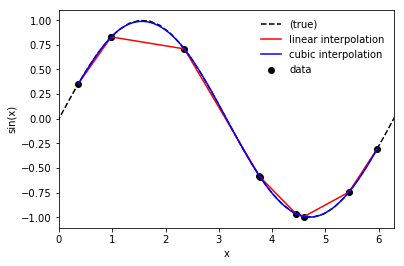

In [52]:
import scipy.interpolate as spi

# 10 sparsely-sampled 'data' points
np.random.seed(42)
x = np.random.uniform(0,2*np.pi,10)
pl.scatter(x,np.sin(x),c='k',label='data')

# Linearly interpolate between these points.
linear_interp = spi.interp1d(x,np.sin(x),kind='linear')
cubic_interp  = spi.interp1d(x,np.sin(x),kind='cubic')

xx  = np.linspace(x.min(),x.max(),100)
_xx = np.linspace(-np.pi/2.0,2.5*np.pi) # Show true curve over a wider range in x
pl.plot(_xx,np.sin(_xx),c='k',ls='--',label='(true)')
pl.plot(xx,linear_interp(xx),c='r',label='linear interpolation')
pl.plot(xx,cubic_interp(xx),c='b',label='cubic interpolation')

pl.xlabel('x')
pl.ylabel('sin(x)')

pl.legend(loc='upper right',frameon=False);
pl.xlim(0,2*np.pi);

**Exercise:** Have a look at the documentation for `interp1d` to figure out why the following cell raises `ValueError` and what your options ar for fixing it.

In [24]:
# 10 sparsely-sampled 'data' points
np.random.seed(42)
x             = np.random.uniform(0,2*np.pi,10)
linear_interp = spi.interp1d(x,np.sin(x),kind='linear')

x_to_interpolate_at = np.arange(0,3*np.pi,np.pi/2.0)
print(linear_interp(x_to_interpolate_at))

ValueError: A value in x_new is below the interpolation range.

One common use of interpolation is to invert functions numerically -- i.e. to construct a continuous function that returns `x(y)` for any `y` using data sampling `y(x)` at a few values of `x`. The example in the next cell inverts `f(x) = sin(x)` (which we know this is `arcsin(x)`).

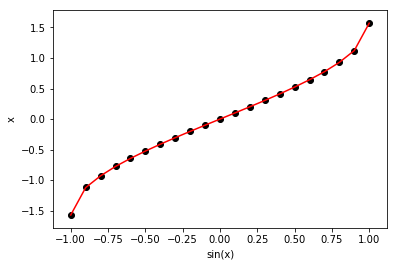

In [54]:
import scipy.interpolate as spi

theta_min  = -np.pi/2.0
theta_max  =  np.pi/2.0
theta_step =  np.pi/32.0

# Inverse of sine function
y = np.arange(theta_min,theta_max+theta_step,theta_step)
linear_interp = spi.interp1d(np.sin(y),y,kind='linear',bounds_error=False)

# Plot the inverse
x = np.arange(-1,1+0.1,0.1)
pl.plot(x,linear_interp(x),c='r',label='interpolated inverse')

# Compare with the arcsin function
pl.scatter(x,np.arcsin(x),c='k',label='true inverse')

pl.xlabel('sin(x)')
pl.ylabel('x');

### Integration

This simple example numerically integrates `y=x**2` between 4 and 6, just to demonstrate how to do this with `scipy`. Practical uses of numerical integration often turn out to be a lot more complicated!

The main point of this example is that numerical integration by Gaussian quadrature often works well enough.

Analytic solution: 50.66666666666667
Quad. solution:    50.66666666666667
Number of samples in interval = 20
Simpson solution:  48.56904933427735


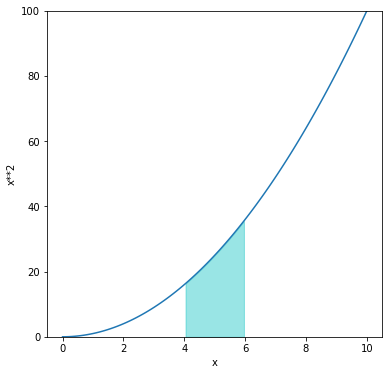

In [62]:
import scipy.integrate as spint

x = np.linspace(0,10,100)

pl.figure(figsize=(6,6))
pl.plot(x,x**2);
pl.fill_between(x,x**2,0,where=((x>=4) & (x<=6)),alpha=0.4,color='c')

# The analytic solution
analytic = lambda x: (1/3.0)*x**3
print('Analytic solution: {}'.format(analytic(6)-analytic(4)))

# The numerical solution using adaptive gaussian quadrature
func = lambda t: t**2 # the function to integrate
integral_quad, quad_err = spint.quad(func,4,6)
print('Quad. solution:    {}'.format(integral_quad))

# The numerical solution using samples of the function
mask = (x>=4) & (x<=6)
print('Number of samples in interval = %d'%(np.sum(mask)))
integral_simps = spint.simps(x[mask]**2,x[mask])
print('Simpson solution:  {}'.format(integral_simps))

pl.ylim(0,100)
pl.xlabel('x')
pl.ylabel('x**2')

Be aware of that functions exist to do Romberg integration: `scipy.integrate.romberg` (continuous functions) and `scipy.integrate.romb` (same thing for discrete samples).

### Finding neighbours with KD Trees

[KDTree](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html) (a class defined in `scipy.spatial.kdtree`) provides an efficient way to search for neighbours of points in a multi-dimensional coordinate space. This example shows how to do this for a 2D array of coordinates (incidentally, it also shows how to draw a circle on a plot).

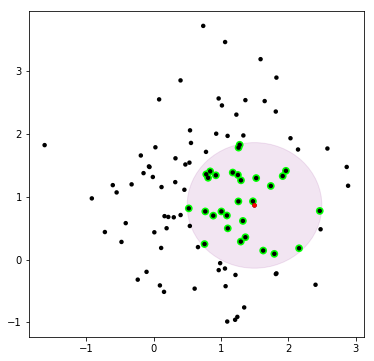

In [63]:
from scipy.spatial.kdtree import KDTree

np.random.seed(42)
xy = np.random.normal(1,1,(100,2))
kd = KDTree(xy) # construct the tree by passing an array of coordinates

# Show the points on a scater plot
pl.figure(figsize=(6,6))
pl.scatter(xy[:,0],xy[:,1],s=20,edgecolor='None',c='k')

# Find all the points within radius r=1 of the first point
radius = 1
idx  = kd.query_ball_point(xy[0,:],radius) # returns the index of each point in xy within r<=1 of element 0

# Highlight the neighbours on the plot
pl.scatter(xy[0,0],xy[0,1],c='r',s=20,zorder=10,edgecolor='None')
for i in idx[:]:
    if i != 0:
        pl.scatter(xy[i,0],xy[i,1],c='lime',s=60,edgecolor='None',zorder=0)

# Draw a circle of radius 1
ax = pl.gca()
ax.add_artist(pl.Circle([xy[0,0],xy[0,1]],radius=radius,color='purple',alpha=0.1,zorder=-1));

There are other functions and techniques associated with the KDTree object.

In the same package there is also `cKDTree`, which is an optimized version of `KDTree` for very large datasets, with fewer functions than `KDTree`.

### More on SciPy

Other important topics in `scipy` include:

* Linear algebra
* Signal processing (resampling, filtering)
* Fourier transformations
* Optimization (finding minima/maxima of functions) and fitting

To learn more about these, follow the tutorial here:
http://www.scipy-lectures.org/intro/scipy.html. 

There are also some exercises to work through:
http://www.scipy-lectures.org/intro/scipy.html#summary-exercises-on-scientific-computing

If you don't have access to a terminal, you can copy the examples and exercises to this notebook.

## Scikits

SciKits are packages that integrate directly with SciPy to provide (in theory) well-tested and robust code for many common scientific tasks. See this link for a description: https://scikits.appspot.com/about. Each has to be installed as a separate package. There are a huge number of these (complete list here: https://scikits.appspot.com/scikits) with varying degrees of comprehensiveness/quality.

Not every major scientific package is a SciKit. For example, Astropy, the main package of general purpose astronomy modules, is not. Being a SciKit does not really bestow any particular special status on a package.

From experience, the most relevant SciKits for astronomers are `scikit-learn` (by far the most common) and `scikit-image` (less often encountered but potentially useful). 

### scikit-learn

http://scikit-learn.org/

This package contains functions for data mining and machine learning. 

It is the basis for a number of other packages, including the astronomy-specific machine learning package `astroML` http://www.astroml.org/.

Install (from this notebook): `!pip3 install --user scikit-learn`
Import: `import sklearn`

There is a bewildering array of different tools in `scikit-learn`. Using any of them requires some understanding of the underlying statistical concepts.

Tutorials: http://scikit-learn.org/stable/tutorial/index.html

The following cell gives a very simple example of using the `GaussianMixture` class from `sklean.mixture` to fit a mixture-of-Gaussians model to some data. In this case the data is sampled from a combination of 2 Gaussian components, so we expect a 2-component mixture moel to be a good fit. 

This example deliberately uses more explict steps than some of the examples of this function you can find online.

True distribution:
Means:          [-5.  4.]
Sigmas:         [ 6.  3.]
Weights:        [ 0.25  0.75]

Fit converged? True

Model distributuion:
Means:          [ 3.83396468 -6.61262424]
Sigmas:         [ 3.15946596  4.87648831]
Weights:        [ 0.79531728  0.20468272]


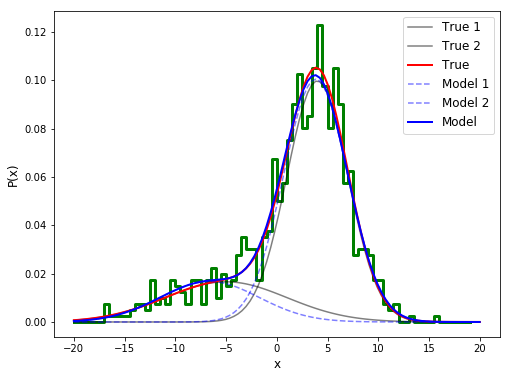

In [375]:
from scipy.stats import norm
from sklearn import mixture

# Define a true distribution with two components
true_means  = np.array([-5.0, 4.0])
true_sigmas = np.array([ 6.0, 3.0])

# True weights of each component
true_weights = np.array([0.25,0.75])

print('True distribution:')
print('%-15s'%('Means:'),   true_means)
print('%-15s'%('Sigmas:'),  true_sigmas)
print('%-15s'%('Weights:'), true_weights)

# Ratio of component 2 to component 1:
true_ratio = true_weights[1]/true_weights[0]

# Number of samples to draw for each component
N1    = 200
N2    = int(true_ratio*N1)

# Sample from each of the componetns of the true distribution
np.random.seed(42)
s1 = np.random.normal(true_means[0],true_sigmas[0],size=N1)
s2 = np.random.normal(true_means[1],true_sigmas[1],size=N2)

# Combine the two samples -- requires some care because
# GaussianMixture requires an input array of shape
# (nsamples,nfeatures)

# Here, nfeatures can be throught of as ndimenions.
# Since we're fitting a 1d ditribution, nfeatures is 1
# So the shape has to be (N1+N2, 1), not (N1+N2,)
S  = np.atleast_2d(np.concatenate([t1,t2])).T

# Fit a 2-component model to the sampled data
# There are many more possible options to GaussianMixture
mixture_model = mixture.GaussianMixture(n_components=2)
mixture_model.fit(S)

print()
print('Fit converged?', mixture_model.converged_)
print()

# Plots
pl.figure(figsize=(8,6))

# Normalized histogram of the sampled data
bins  = np.arange(-20,20,0.5)
h1, _ = np.histogram(s1, bins=bins,normed=True)
h2, _ = np.histogram(s2, bins=bins,normed=True)
H,  _ = np.histogram(S,  bins=bins,normed=True)
pl.plot(bins[:-1], H, drawstyle='steps-post',lw=3,c='green')

# Plot the underlying distributions as solid lines
x  = np.linspace(-20,20,100)
y1 = true_weights[0]*norm.pdf(x, true_means[0], true_sigmas[0])
y2 = true_weights[1]*norm.pdf(x, true_means[1], true_sigmas[1])
Y  = y1 + y2

pl.plot(x, y1 ,c='k',alpha=0.5,label='True 1')
pl.plot(x, y2 ,c='k',alpha=0.5,label='True 2')
pl.plot(x, Y,  c='r',lw=2,label='True')
pl.legend(fontsize=12);

# Extract the model components
# The flattening and indexing here is just because means_ and covariances_ 
# have shapes that reflect their generalization to N components.
model_means   = mixture_model.means_.flatten()
model_sigmas  = np.sqrt(mixture_model.covariances_[:,0]).flatten()
model_weights = mixture_model.weights_

print('Model distributuion:')
print('%-15s'%('Means:'),   model_means)
print('%-15s'%('Sigmas:'),  model_sigmas)
print('%-15s'%('Weights:'), model_weights)

# Model components (note scale = sqrt(variance))
M1 = model_weights[0]*norm.pdf(x, model_means[0], model_sigmas[0])
M2 = model_weights[1]*norm.pdf(x, model_means[1], model_sigmas[1])
M  = M1 + M2

# Plot the model
pl.plot(x, M1,c='b',alpha=0.5,label='Model 1',ls='--')
pl.plot(x, M2,c='b',alpha=0.5,label='Model 2',ls='--')
pl.plot(x, M, c='b',label='Model',lw=2)

pl.xlabel('x',fontsize=12)
pl.ylabel('P(x)',fontsize=12)
pl.legend(fontsize=12);

We can compare the evidence for different numbers of components in fitting the data by using the 'AIC' measure. The best model mimimizes the AIC.

See: https://en.wikipedia.org/wiki/Akaike_information_criterion

The best Gaussian mixture model has 2 components.


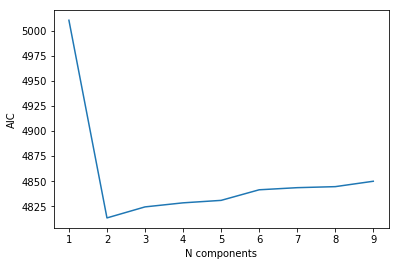

In [377]:
aics = list()
for ncomp in range(1,10):
    model = mixture.GaussianMixture(n_components=ncomp)
    model.fit(S)
    aics.append(model.aic(S))
    
pl.plot(range(1,10),aics)
pl.ylabel('AIC')
pl.xlabel('N components');

print('The best Gaussian mixture model has %d components.'%(np.argmin(aics)+1))

## HDF5

HDF5 is probably the best format for large binary datasets with complicated structure (better than fits, because FITS gets rather tricky for multidimensional array data, and for data split into many small groups). 

Many simulation codes output their results as HDF5. If you're saving more than `>100 Mb` of data, HDF5 is more practical than `pickle` or `numpy.savez`, and more portable.

HDF5 files are collections of arrays (called 'datasets') arranged in a hierarchical structure a bit like a file system (rather than directories with files in them, there are 'groups' with datasets in them). You could also think of them as being similar to Python `dicts`. It's possible to associate 'attributes' ('headers', like comments or units) with individual datasets and to compress them to save disk space.

Strangely, there are *two* almost equally good packages to deal with HDF5 in python: [`h5py`](http://www.h5py.org/) and [`PyTables`](http://www.pytables.org/). The style of these packages is slightly different, with `PyTables` being slightly closer to the way of working with hdf5 in `C` and focusing on high performance, and `h5py` being more abstract and closer to other python packages like `numpy`, focused on ease of use. The differences are described by the authors of `PyTables` [here](http://www.pytables.org/FAQ.html#how-does-pytables-compare-with-the-h5py-project) and by the `h5py` team [here](http://docs.h5py.org/en/latest/faq.html#what-s-the-difference-between-h5py-and-pytables). For general use either is probably fine, because `PyTables` is pretty easy to use now too.

For this example you need to install `h5py` and follow the [quick start page](http://docs.h5py.org/en/latest/quick.html) and [instructions for readoing and writing datasets](http://docs.h5py.org/en/latest/high/dataset.html) to understand how to create an HDF5 file and read it back in.

Note that `PyTables` is provided by the package `tables` (without the `py`!).

In [112]:
import h5py
import numpy as np

# Fake data
mass_dm    = np.random.random(100)
mass_stars = np.random.random(100)
age_stars  = np.random.random(100)

# Write a file
f = h5py.File('mydata.hdf5', mode='w')
try: # (see following notes for an explanation of try..finally..)
    f.create_dataset('/dm/mass',    data=mass_dm) # we give the 'path' to the data in each case
    f.create_dataset('/stars/mass', data=mass_stars)
    f.create_dataset('/stars/age',  data=age_stars)
finally:
    f.close()

# Read the same file back
g = h5py.File('mydata.hdf5',mode='r')
try:
    stellar_mass_dataset = g['/stars/mass'] # This deliberately looks like accessing a dict object
    
    # As long as the file is open, the array can be accessed.
    print('type of stellar mass dataset: {}'.format(type(stellar_mass_dataset)))
    print('stellar_mass_dataset is {}'.format(stellar_mass_dataset))
    print('First 10 elements of stellar mass: {}'.format(stellar_mass_dataset[0:10]))
    
    # If you want to use the data after the file is closed,
    # store its `value`
    stellar_mass_values = stellar_mass_dataset.value[0:10]
finally:
    g.close();
print("After we've closed the file...")
print('stellar_mass_values is {}'.format(stellar_mass_values))
print('stellar_mass_dataset is {}'.format(stellar_mass_dataset))

ModuleNotFoundError: No module named 'h5py'

Why the `try..finally` block in that example? Remember that the point of the `try` block is to capture exceptions that happen inside it so you can do something with them rather than stopping the code. The exceptions can be handled with an `except` clause.

***The code in the `finally` part of the block is *guaranteed* to be executed regardless of what happens in the `try..except..` part.***

In the example above, we don't handle any exceptions with `except`, but we do use the `try` to make sure that the file is closed properly (with `f.close()`) even if something goes wrong.

You don't *have* to do this, but in the past I've found it's possible to corrupt hdf5 files that are being written to if something goes wrong during the write and the file isn't properly closed. 

It's common to modify HDF5 files that already exist. This is one of the advantages of the 'directory-like' structure of HDF5: if you compute something based on the data in a file (for example, if you compute the magnitudes of a bunch of stars for which you already have fluxes) then it's very easy to store that information in the same file as a separate dataset (it's a real pain to do that with FITS). In such casess you want to be careful not to corrupt the file, so I always wrap the access to the file in a `try..finally` to be on the safe side.

You could also try the same thing with `pytables` (tutorial [here](http://www.pytables.org/usersguide/tutorials.html)). This simple example looks very similar between the two packages.

In [113]:
import tables as tb # Note, not pytables

# Fake data
mass_dm    = np.random.random(100)
mass_stars = np.random.random(100)
age_stars  = np.random.random(100)

f = tb.open_file('my_data.hdf5',mode='w')
try:
    # createparents=True makes sure the 'path' to the dataset exists
    f.create_array('/dm',   'mass',obj=mass_dm,createparents=True)
    f.create_array('/stars','mass',obj=mass_stars,createparents=True)
    f.create_array('/stars','age', obj=age_stars,createparents=True)
finally:
    f.close()

# Read the same file back
g = tb.open_file('mydata.hdf5',mode='r')
try:
    # In pytables you can either use a object-like syntax for getting groups/datasets...
    stellar_mass_dataset = g.root.stars.mass
    # ... or this way, which looks more like pytables:
    stellar_mass_dataset = g.get_node('/stars/mass')
    
    # As long as the file is open, the array can be accessed.
    print('type of y: {}'.format(type(stellar_mass_dataset)))
    print('stellar_mass_daaset is {}'.format(stellar_mass_dataset))
    print('First 10 elements of stellar_mass_dataset: {}'.format(stellar_mass_dataset[0:10]))
    
    # In pytables, slicing the array gives the data directly
    # To get the whole array, do values = dataset[:] or values = dataset.read()
    stellar_mass_values = stellar_mass_dataset[0:10]
finally:
    g.close();
print("After we've closed the file...")
print('stellar_mass_values is {}'.format(stellar_mass_values))
print('stellar_mass_dataset is {}'.format(stellar_mass_dataset))


ModuleNotFoundError: No module named 'tables'

In [114]:
# These might not be installed on your system, if not then the following
# shell commands will not work.

!echo 'Output of h5ls:'
!h5ls 'mydata.hdf5'
!echo
!echo 'Output of h5ls/stars:'
!h5ls 'mydata.hdf5/stars'
!echo
!echo 'Output of h5dump -g /dm (to show the contents of the /dm group only)'
!h5dump -g /dm 'mydata.hdf5'

Output of h5ls:
mydata.hdf5: unable to open file

Output of h5ls/stars:
mydata.hdf5/stars: unable to open file

Output of h5dump -g /dm (to show the contents of the /dm group only)
h5dump error: unable to open file "mydata.hdf5"


## Reading binary files written by Fortran codes

If you ever need to read arrays directly from binary files (this is how lots of simulation data used to be stored, before the likes of HDF5), then `numpy.fromfile` is the tool to use. `numpy` arrays have a method `tofile` that can be used in a similar way to write your own raw binary files if you ever need to, but in most cases you shouldn't need to: always use `numpy.save`, `hdf5` or some other portable, easy-to-use format for working with binary data. Unfortunately other people will not follow this advice, so you may still need to know how to read binary files.

The `Fortran` language has a special `formatted` binary output, where each block of data is preceded by two bytes holding the length of the block in bytes, which I call the 'header'. An identical 'footer' is written at the end of the data block. The point of these is to allow you to move quickly through a binary file, because you only have to read the header blocks to 'skip' over the data blocks. The point of the footer is a consistency check that you've read the right number of data bytes. The following example writes such a file and then reads it again, to illustrate how `tofile` and `fromfile` work.

In [115]:
# Make some data
x = np.arange(0,100,dtype=np.float64)

# Write data to a file
with open('my_binary_file.dat','wb') as f:
    np.array(len(x),dtype='i8').tofile(f) # Header byte 
    x.tofile(f)                           # The array
    np.array(len(x),dtype='i8').tofile(f) # Footer byte

# Read the file
with open('my_binary_file.dat','rb') as f: # Open in binary read mode
    block_length_start = np.fromfile(f,'i8',1)
    data               = np.fromfile(f,'f8',int(block_length_start))
    block_length_end   = np.fromfile(f,'i8',1)
    assert(block_length_start == block_length_end) # Assert thrown an exception if its condition is false
    
print(data)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.
  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.
  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.
  90.  91.  92.  93.  94.  95.  96.  97.  98.  99.]


## Pandas

`pandas` is a general-purpose package for statistics and databases organized as tables. It's not all that widely used in astronomy, but it's very widely used for 'data science' in general.

[Here](http://pandas.pydata.org/pandas-docs/stable/overview.html) is an overview of what can be done with `pandas`. Some of the functions overlap with more astronomy-specific versions in `astropy` (for example, reading and manipulating data tables). I don't find `pandas` very easy to understand or use.

There is a collection of `pandas` tutorials here: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

### PyMC and emcee

It's becoming 

PyMC: https://pymc-devs.github.io/pymc/
emcee: http://dfm.io/emcee/current/

They both have excellent tutorials to get started.
https://github.com/pymc-devs/pymc/wiki
http://dfm.io/emcee/current/user/quickstart/

`PyMC` is very general, `emcee` 

If you make lots of multidimensional likelihood plots, you may be interetested in the `corner` package: http://corner.readthedocs.io/en/latest/

You may also want to investigate MultiNest, for which there is a Python wrapper:
https://johannesbuchner.github.io/PyMultiNest/pymultinest.html

## End of Notebook